In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

from nn.Activation import Tanh, Softmax,Relu
from nn.Module import Sequential, Linear
from nn.utils import plot_decision_boundary
from nn.Loss import CrossEntropy
from nn.Optimizer import Adam

In [2]:
n_samples = 100
n_features = 2
n_class = 7
seed = 39

In [ ]:
np.random.seed(seed)

In [3]:
X,y = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_class,random_state=seed)
X.shape,y.shape

((100, 2), (100,))

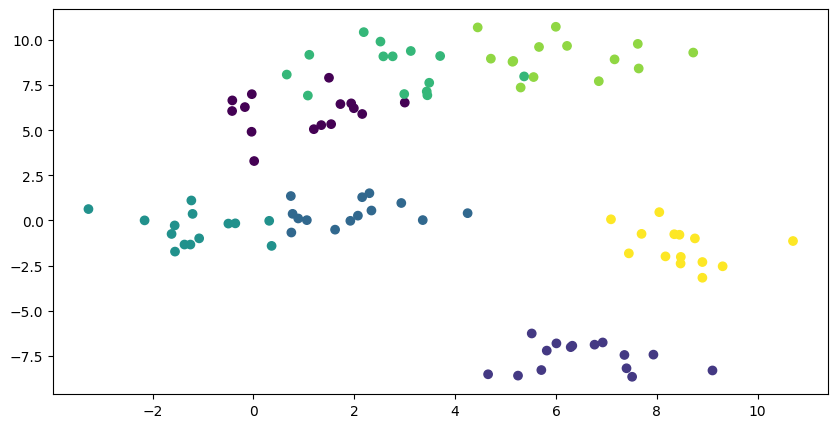

In [4]:
figure = plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=y);

In [5]:
model = Sequential(
    Linear(n_features,10),
    Relu(),
    Linear(10,10),
    Tanh(),
    Linear(10,10),
    Tanh(),
    Linear(10,n_class),
    Softmax()
)

In [6]:
loss = CrossEntropy()
optimizer = Adam(lr=0.001)

In [7]:
epochs = 2000
for i in range(epochs):
    model.clear_gradients()
    output = model.forward(X)
    loss_value = loss.forward(output, y)
    grad = loss.backward(output, y)
    model.backward(grad)
    model.average_gradients(X.shape[0])
    optimizer.step(model)
    # print(f"Epochs:{i + 1}/{epochs} loss:{round(loss_value, 4)}")

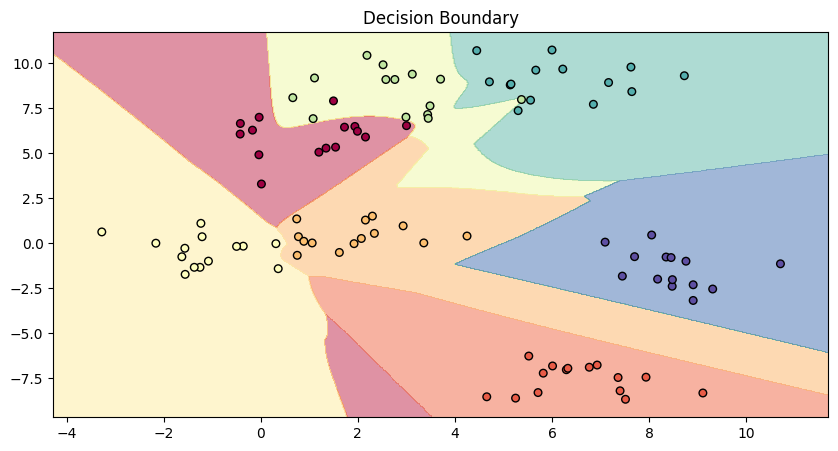

In [8]:
plot_decision_boundary(model, X, y)